# **Lab Report: Hyperparameter tuning**

### **Student information**
- Student name: Bart Peelman
- Student code: CODE

### **Assignment description**
The assignment was about optimizing a TensorFlow model for deployment. We trained a baseline CNN, then applied post-training quantization, quantization aware training, and weight pruning. The goal was to see how these techniques affect model size and accuracy, and to be able to convert the models to TensorFlow Lite for efficient use on mobile or embedded devices.

### **Proof of work done**
#### Lab 4: Hyperparameter tuning
##### 4.1 Hyperparameter tuning
*Hyperparameter tuning is the process of finding the best hyperparameters for a model. Hyperparameters are the parameters that are not learned by the model, but are set by the data scientist. Examples of hyperparameters are the learning rate, the number of hidden layers in a neural network, the number of trees in a random forest, etc. The goal of hyperparameter tuning is to find the hyperparameters that give the best performance on a validation set.*

#### 4.2 Tutorials

#### ❓Questions

#### *Notebook 1: Introduction to the Keras Tuner*

- ##### What is the function of hp.Choice()?

*`hp.Choice()` is used to select one value from a predefined list of categorical or discrete options. In this tutorial, it is used to choose the learning rate from a fixed set of values.*


- ##### What is the difference with hp.Int()?

*`hp.Int()` samples an integer value from a specified range, optionally using a step size. Here, it is used to tune the number of units in the dense layer between 32 and 512.*

- ##### Summary:

*`hp.Choice()` is suited for categorical hyperparameters, while `hp.Int()` is used for numerical ranges.*


- ##### Why do we use tf.keras.callbacks.EarlyStopping()?

*The `EarlyStopping` callback is used to stop training when the validation loss no longer improves. This helps prevent overfitting and reduces unnecessary computation.*

*During hyperparameter tuning, many models are trained. Early stopping ensures that poorly performing configurations do not waste resources by training for the full number of epochs.*


- ##### Train the model without hyperparameter tuning using the following parameters:

*The baseline (non-tuned) model we trained in this notebook uses:*
- 512 hidden units
- A learning rate of 0.005

- ##### Do you see a difference? Which model (with/without hyperparameter tuning) does the best job? How can you prove this?

The baseline model achieved a test accuracy of **0.8714** with a test loss of **0.5738**. Its validation accuracy plateaued around 0.880, indicating that the model learned reasonably well but could not improve further with the given architecture and learning rate.

The hyperparameter-tuned model, on the other hand, reached its best performance at **epoch 29**, achieving a validation accuracy of **0.8980** and a test accuracy of **0.8938**. The lower loss and higher accuracy demonstrate that tuning the hyperparameters allowed the network to learn more effectively.

**Conclusion:** The hyperparameter-tuned model performs better than the baseline model. This is visible from the higher test accuracy and improved validation accuracy. The improvement proves that selecting optimal hyperparameters (such as learning rate, number of units, and activation functions) can significantly enhance model performance.


#### *Notebook 2: Getting started with Keras Tuner*

- ##### What’s the difference between `max_trials` and `executions_per_trial`?

*`max_trials` specifies the number of different hyperparameter configurations the tuner will try.*  
*`executions_per_trial` specifies how many times each configuration is trained and evaluated.*  

*Advantages:*  
- Using multiple executions per trial reduces variance caused by random initialization or stochastic training, providing more reliable evaluation of a hyperparameter configuration.  
- `max_trials` ensures exploration of the hyperparameter space.  

*Disadvantages:*  
- Increasing `executions_per_trial` increases runtime proportionally.  
- Too few `max_trials` may not sufficiently explore the hyperparameter space, potentially missing better configurations.

- ##### What are the (dis)advantages of using `HyperModel` instead of `build_model()`?

*`HyperModel` is a class-based approach for defining models, whereas `build_model()` is a simple function that returns a compiled model.*  

*Advantages of `HyperModel`:*  
- Can override both `build()` and `fit()`, giving full control over model creation and training.  
- Useful for more complex workflows, custom evaluation, or non-standard objectives.  
- Integrates seamlessly with KerasTuner for advanced use cases.  

*Disadvantages:*  
- More verbose and complex to implement than a simple function.  
- Overkill for straightforward models or small experiments where `build_model()` is sufficient.

- ##### Why would you use `hp.get()`?

*`hp.get()` allows you to retrieve the value of a previously defined hyperparameter within the `HyperModel` or `build_model()` context.*  

- When you need to conditionally set another hyperparameter based on the value of an existing one.  
- Helps implement dependent hyperparameters or more advanced search spaces.  


- ##### How can you use `RootMeanSquaredError` instead of `MeanAbsoluteError` as the tuning objective?

*You can create a custom metric by subclassing `keras.metrics.Metric`, implement the RMSE calculation using TensorFlow/Keras operations, and then specify it as the tuning objective.*

**Steps:**

1. Define the custom metric `RootMeanSquaredError`.  
2. Include it in the model’s `metrics` when compiling.  
3. Set `objective=keras_tuner.Objective("val_root_mean_squared_error", direction="min")` in the tuner.

**Comparison:**

- Train both MAE and RMSE objectives using the same dataset for consistency.  
- Evaluate and store both results in the notebook.  
- Observe that MAE focuses on average absolute differences, while RMSE penalizes larger errors more heavily.

- ##### When can you use HyperResNet and HyperXception? What are they?

*These are pre-made, tunable models for computer vision tasks.*

***Key points:***

- Designed for image classification tasks (e.g., 28×28 grayscale images for multiple classes).
- Already compiled with loss="categorical_crossentropy" and metrics=["accuracy"].
- Ideal for quick experiments on standard datasets without needing to implement a network from scratch.


#### *Notebook 3: Visualize the hyperparameter tuning proces*



##### Screenshot of the accuracy and loss graphs
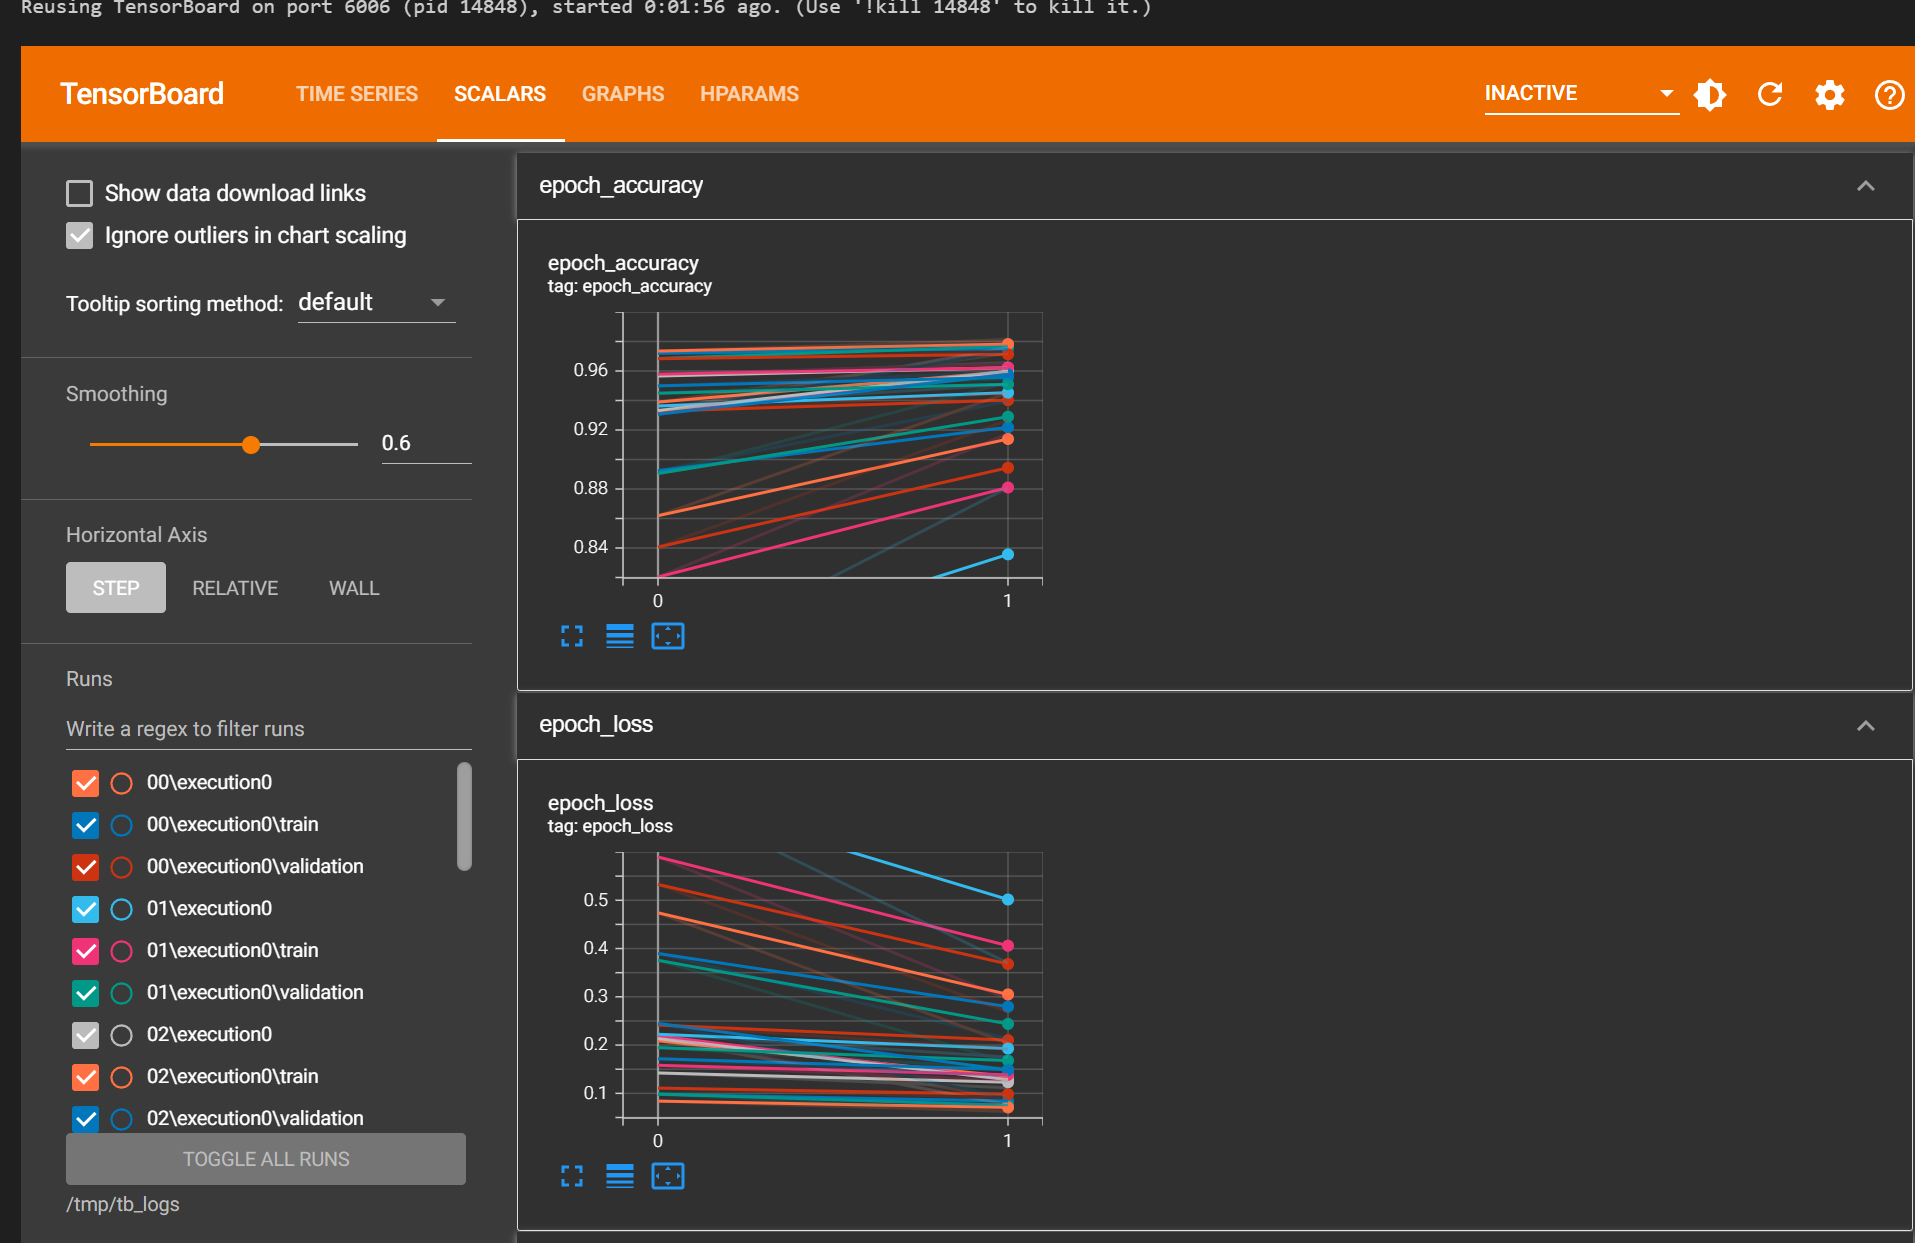



##### Screenshot of the Hyperparameters
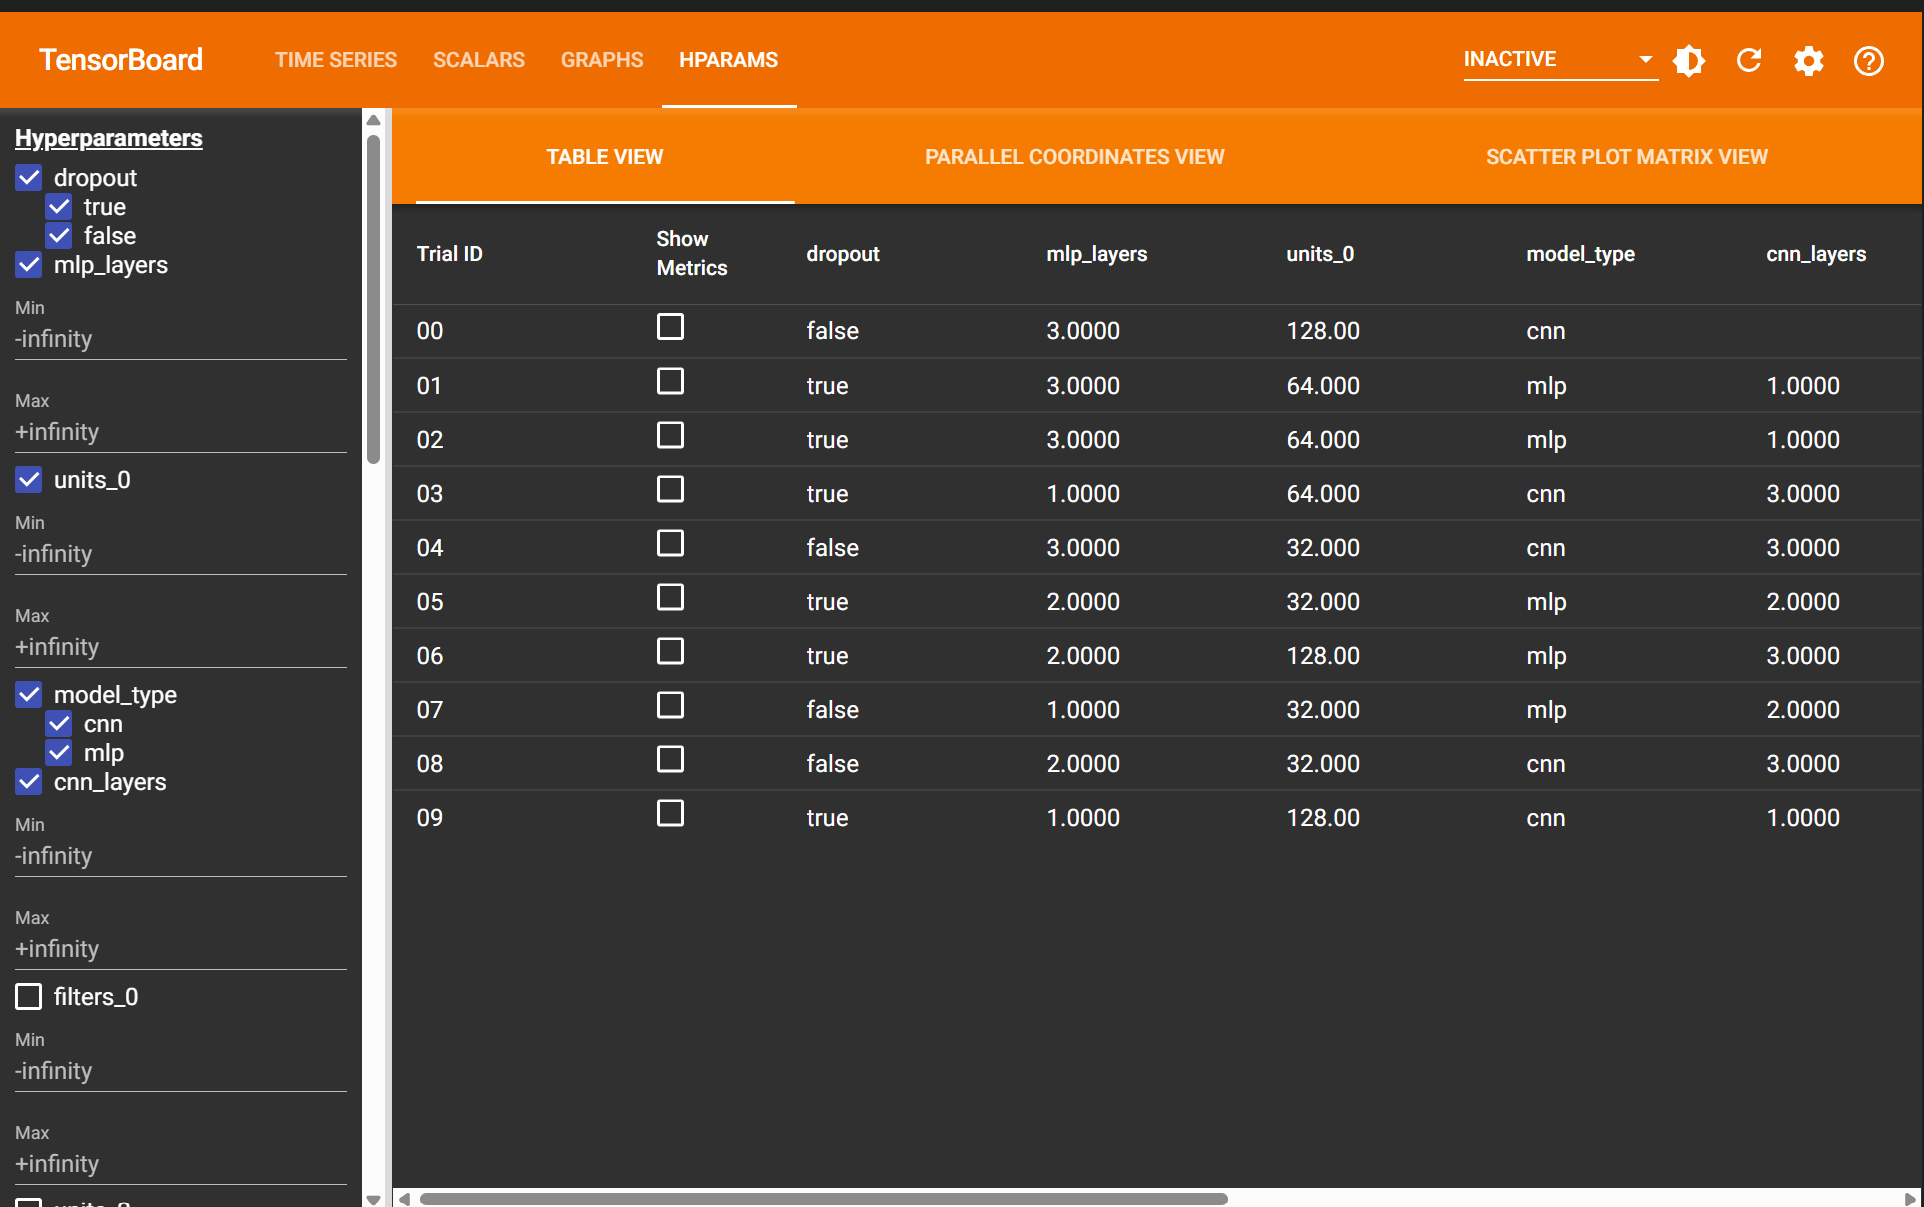

### **Evaluation criteria**
- ✅ Show that you've executed the notebook and pushed it to the repository  
- ✅ Show that you can convert a TensorFlow model to a TensorFlow Lite model  
- ✅ Show that you can execute post-training quantization on a model  
- ✅ Show that you can train a quantization aware model  
- ✅ Show that you can perform weight pruning on a model  
- ✅ Show that you wrote an elaborate lab report in Markdown and pushed it to the repository  
- ✅ Provide an answer to all questions marked with ❓, use code to support your answers where applicable  
  - ✅ Discuss the answers during the demo session  



### **Issues**
- **TensorFlow version:** The notebook needed TF 2.14 to work with `tensorflow_model_optimization`. Colab didn’t have it, so I ran it locally with TF 2.14.1 and TFMOT 0.8.0. Fixed pruning and quantization errors.  
- **Quantization aware training:** `quantize_model()` didn’t work in Colab due to version issues. Worked fine after using TF 2.14.1 locally.  
- **VS Code virtual environment:** My venv wasn’t detected automatically, so I manually selected it as the kernel.
- **Pruning callbacks:** Needed `UpdatePruningStep()` callback in `model.fit()` to make pruning actually work.

### **Reflection**
The hardest part was fixing the version issues for pruning and quantization. Setting up the venv and kernel in VS Code was a bit tricky too. The easier part was actually training and converting the models once everything was set up. I learned a lot about quantization, pruning, and TFLite conversion. Next time, I’d make sure the environment is fully compatible before starting the notebook to save time.

### **Resources**
List all sources of useful information that you encountered while completing this assignment: books, manuals, HOWTO's, blog posts, etc. Note: AI is not considered a valid literary source. Do not cite, for example, https://chatgpt.com. If you use AI, let it guide you to real, reliable sources instead